In [1]:
#Import libraries:
import pandas as pd
import numpy as np

import re

import nltk
nltk.download('punkt')
nltk.download('wordnet') # wordnet is the most well known lemmatizer for english
nltk.download('stopwords')

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.probability import FreqDist

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\beatr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\beatr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\beatr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Upload and Analysis data

In [2]:
#Upload data:

data = pd.read_csv("C:\\Users\\beatr\\Documents\\Beatriz\\Ironhack\\Projects\\NLP_DisneylandReviews\DisneylandReviews.csv", encoding='latin-1')

In [3]:
data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [4]:
#data = data.sample(n = 10000)

In [5]:
# Data Analysis:

len(data)

42656

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [7]:
data.isna().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [8]:
data["Rating"].value_counts()

5    23146
4    10775
3     5109
2     2127
1     1499
Name: Rating, dtype: int64

In [9]:
data.groupby("Branch")["Rating"].count()

Branch
Disneyland_California    19406
Disneyland_HongKong       9620
Disneyland_Paris         13630
Name: Rating, dtype: int64

In [10]:
data.groupby(["Branch","Rating"])["Rating"].count()

Branch                 Rating
Disneyland_California  1           499
                       2           747
                       3          1661
                       4          3981
                       5         12518
Disneyland_HongKong    1           172
                       2           336
                       3          1365
                       4          3230
                       5          4517
Disneyland_Paris       1           828
                       2          1044
                       3          2083
                       4          3564
                       5          6111
Name: Rating, dtype: int64

In [11]:
data["Rating"].describe()

count    42656.000000
mean         4.217695
std          1.063371
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [12]:
data["Rating"].value_counts(normalize=True)

5    0.542620
4    0.252602
3    0.119772
2    0.049864
1    0.035142
Name: Rating, dtype: float64

c:\users\beatr\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

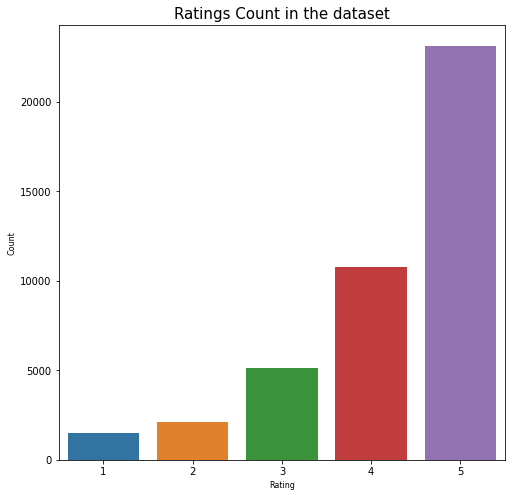

In [13]:
plt.figure(figsize=(8,8))
sns.countplot(data['Rating'])
plt.title('Ratings Count in the dataset',fontsize=15)
plt.xlabel('Rating',fontsize=8)
plt.ylabel('Count',fontsize=8)

# Treating the Reviews column

In [14]:
def clean_up(s):
    """
    Cleans up numbers, URLs, and special characters from a string.

    Args:
        s: The string to be cleaned up.

    Returns:
        A string that has been cleaned up.
    """
    
    final = s.lower()
    #print(final)
    
    final = re.sub("http:\S+", " ", final)
    #print(final)
    
    final = re.findall("[a-z]+", final)
    #print(final)
    
    return ' '.join(final)

In [15]:
data["Reviews_clean"] = data["Review_Text"].apply(clean_up)
data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Reviews_clean
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,if you ve ever been to disneyland anywhere you...
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,its been a while since d last time we visit hk...
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,thanks god it wasn t too hot or too humid when...
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,hk disneyland is a great compact park unfortun...
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,the location is not in the city took around ho...


In [16]:
def tokenize(s):
    """
    Tokenize a string.

    Args:
        s: String to be tokenized.

    Returns:
        A list of words as the result of tokenization.
    """
    
    return nltk.word_tokenize(s)

In [17]:
data["Reviews_clean"] = data["Reviews_clean"].apply(tokenize)
data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Reviews_clean
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,"[if, you, ve, ever, been, to, disneyland, anyw..."
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,"[its, been, a, while, since, d, last, time, we..."
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,"[thanks, god, it, wasn, t, too, hot, or, too, ..."
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,"[hk, disneyland, is, a, great, compact, park, ..."
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,"[the, location, is, not, in, the, city, took, ..."


In [18]:
def stem_and_lemmatize(l):
    """
    Perform stemming and lemmatization on a list of words.

    Args:
        l: A list of strings.

    Returns:
        A list of strings after being stemmed and lemmatized.
    """
    
    ps = PorterStemmer()
    stemmed = [ps.stem(w) for w in l]
    
    lemmatizer = WordNetLemmatizer() 
    lemmatized = [lemmatizer.lemmatize(word) for word in stemmed]
    
    return lemmatized

In [19]:
data["Reviews_clean"] = data["Reviews_clean"].apply(stem_and_lemmatize)
data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Reviews_clean
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,"[if, you, ve, ever, been, to, disneyland, anyw..."
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,"[it, been, a, while, sinc, d, last, time, we, ..."
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,"[thank, god, it, wasn, t, too, hot, or, too, h..."
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,"[hk, disneyland, is, a, great, compact, park, ..."
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,"[the, locat, is, not, in, the, citi, took, aro..."


In [20]:
variable = stopwords.words("english")

def remove_stopwords(l):
    """
    Remove English stopwords from a list of strings.

    Args:
        l: A list of strings.

    Returns:
        A list of strings after stop words are removed.
    """
    removing = [w for w in l if not w in variable]
    return removing

In [21]:
data["Reviews_clean"] = data["Reviews_clean"].apply(remove_stopwords)
data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Reviews_clean
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,"[ever, disneyland, anywher, find, disneyland, ..."
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,"[sinc, last, time, visit, hk, disneyland, yet,..."
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,"[thank, god, hot, humid, wa, visit, park, othe..."
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,"[hk, disneyland, great, compact, park, unfortu..."
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,"[locat, citi, took, around, hour, kowlon, kid,..."


In [22]:
def re_blob(row):
    return " ".join(row['Reviews_clean'])

In [23]:
data['Reviews_clean'] = data.apply(re_blob, axis=1)
data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Reviews_clean
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,ever disneyland anywher find disneyland hong k...
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,sinc last time visit hk disneyland yet thi tim...
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,thank god hot humid wa visit park otherwis wou...
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,hk disneyland great compact park unfortun quit...
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,locat citi took around hour kowlon kid like di...


In [24]:
#from nltk.sentiment import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')

#sia = SentimentIntensityAnalyzer()

#def is_positive(review):
#    if sia.polarity_scores(review)["compound"] > 0: # when the compound score is greater than 0 the reviewer is positive
#        return 1 # 1 for positive
#    return 0 # 0 for negative or neutral

#data["sentiment"] = data["Reviews_clean"].apply(is_positive)

In [25]:
#data["sentiment"].value_counts()

In [26]:
#def intensity(review):
#    return (abs(sia.polarity_scores(review)["compound"])+1)**2 # to give more importance the intense reviews we are going to square it

#data['intensity'] = data["Reviews_clean"].apply(intensity)

In [27]:
#data["intensity"].value_counts()

# Bag of words

In [28]:
#Creating a Bag of words:

list_words = []

for row in data["Reviews_clean"]:
    for word in row:
        list_words.append(word)

list_words = nltk.FreqDist(list_words)
#print(list_words)

top_words = list(list_words.keys())[:5000]
#print(top_words)

In [29]:
#let's take only the most common 1000 words
bow_vect = CountVectorizer(max_features = 1000)

# fit creates one entry for each different word seen  
x = bow_vect.fit_transform(data['Reviews_clean']).toarray()

df = pd.DataFrame(x, columns = bow_vect.get_feature_names())
df.shape

df.head()

c:\users\beatr\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abl,abov,absolut,accept,access,accommod,across,activ,actual,ad,...,worth,would,wow,wrong,ye,year,yet,young,younger,yr
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#df["sentiment_number"] = data["sentiment"]
#df["intensity_number"] = data["intensity"]

In [31]:
y = data["Rating"].copy()

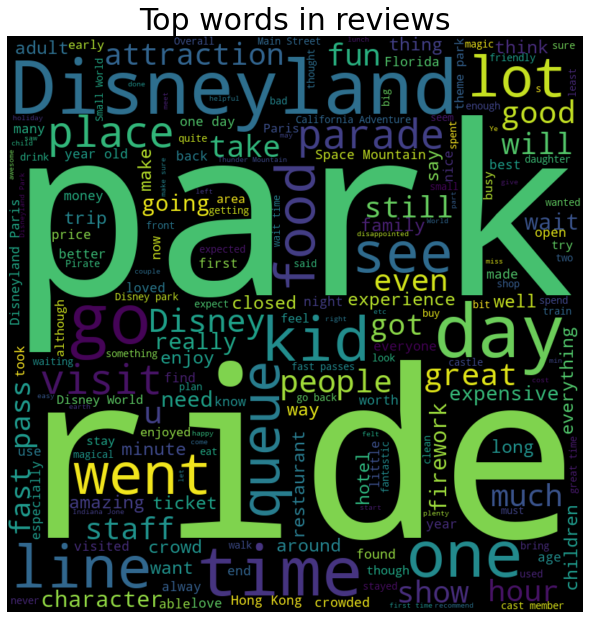

In [32]:
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))                      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show()
    
wordCloud_generator(data['Review_Text'], title="Top words in reviews")

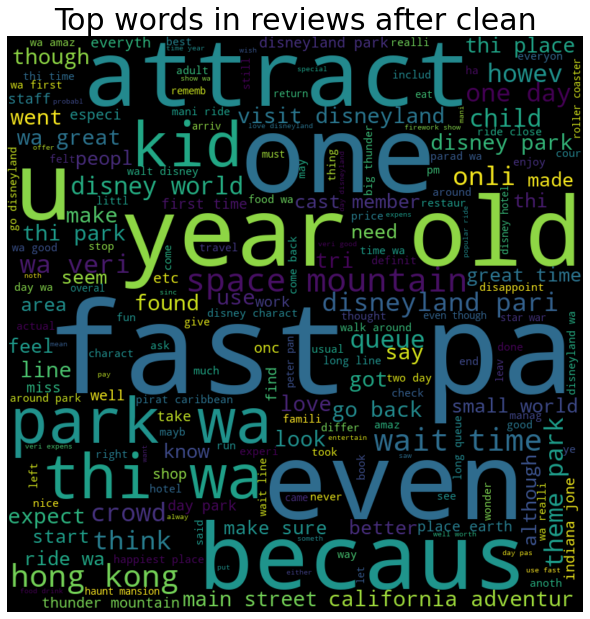

In [33]:
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))                      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show()
    
wordCloud_generator(data['Reviews_clean'], title="Top words in reviews after clean")

# LogisticRegression Model

In [177]:
# Instantiating a LogisticRegression Model (this is classification)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0, max_iter=10000)

# Splitting the datasets into training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, y, train_size = 0.8, random_state = 0)

# Fitting our model
model.fit(x_train, y_train)

predicted = model.predict(x_test)

# evaluate (y_test == predicted)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted)

0.6169714017815283

In [178]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[ 113,   67,   52,   11,   38],
       [  79,  106,  149,   51,   64],
       [  47,  113,  335,  230,  333],
       [  21,   28,  202,  569, 1334],
       [   5,   16,   79,  349, 4141]], dtype=int64)

In [179]:
from sklearn.metrics import r2_score
r2_score(y_test, predicted)

0.31447621151693306

# RandomForestClassifier

In [37]:
# Instantiating a RandomForest

from sklearn.ensemble import RandomForestClassifier

# Split the data

x_train, x_test, y_train, y_test = train_test_split(df, y, train_size = 0.8, random_state = 0)

# define models
forest = RandomForestClassifier(random_state=0)

forest.fit(x_train, y_train)

predicted = forest.predict(x_test)

accuracy_score(y_test, predicted)

0.5638771683075481

In [38]:
confusion_matrix(y_test, predicted)

array([[  16,    6,   43,   76,  140],
       [   7,    5,   71,  113,  253],
       [   2,    4,   74,  268,  710],
       [   0,    1,   26,  332, 1795],
       [   0,    1,    6,  199, 4384]], dtype=int64)

In [39]:
r2_score(y_test, predicted)

-0.15514770012513757

# Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

predicted = nb.predict(x_test)

accuracy_score(y_test, predicted)

0.5255508673230193

In [41]:
confusion_matrix(y_test, predicted)

array([[  92,   59,   50,    5,   75],
       [  92,   95,   95,   31,  136],
       [  91,  146,  197,  147,  477],
       [  71,  146,  213,  395, 1329],
       [  86,  134,  154,  511, 3705]], dtype=int64)

In [42]:
r2_score(y_test, predicted)

-0.2585128921262323

# xgboost

In [43]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
#https://xgboost.readthedocs.io/en/latest/parameter.html

x_train, x_test, y_train, y_test = train_test_split(df, y, train_size = 0.8, random_state = 0)

# specify parameters via map
param = {
    'booster': 'gbtree'
    ,'max_depth': 3
    ,'learning_rate': 0.3
    ,'subsample': 0.5
    ,'sample_type': 'uniform'
    #,'objective': 'binary:hinge'
    #,'obejective:'binary:logistic'
    ,'rate_drop': 0.0
    ,'n_estimators': 2000
    ,'verbosity':3
    #,'nthread': 5
}

d_train = xgb.DMatrix(x_train, y_train)
d_test = xgb.DMatrix(x_test, y_test)

clf = xgb.train(param, d_train)

# make prediction
preds = clf.predict(d_test)

# print accuracy score
r2_score(y_test, preds)

[12:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators", "rate_drop", "sample_type" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:07:07] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:155: Using tree method: 2
[12:07:07] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:07:07] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:07:07] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree

0.25152715248978197

# Get a new text review 

In [196]:
dataframe_newreview = pd.DataFrame(columns = ['Review_Text'])

dataframe_newreview['Review_Text'] = [input("Can you give us your review?")]

Can you give us your review?it was the worst dirty place


In [197]:
dataframe_newreview["Reviews_clean"] = dataframe_newreview['Review_Text'].apply(clean_up)
dataframe_newreview.head()

dataframe_newreview["Reviews_clean"] = dataframe_newreview["Reviews_clean"].apply(tokenize)
dataframe_newreview.head()

dataframe_newreview["Reviews_clean"] = dataframe_newreview["Reviews_clean"].apply(stem_and_lemmatize)
dataframe_newreview.head()

dataframe_newreview["Reviews_clean"] = dataframe_newreview["Reviews_clean"].apply(remove_stopwords)
dataframe_newreview.head()

dataframe_newreview["Reviews_clean"] = dataframe_newreview.apply(re_blob, axis = 1)
dataframe_newreview.head()

dataframe_newreview.drop(["Review_Text"], axis = 1)

,Reviews_clean
0,wa worst dirti place


In [198]:
#get the columns and one row of our bag of words

new_review = df.iloc[0]
new_review.values[:] = 0

#from our new review split and add as a list
list_new_review = dataframe_newreview["Reviews_clean"].str.split(" ")

#interate over the new review to get the frequency of each word
for word in list_new_review[0]:
    if word in list(new_review.index):
        new_review[word] = +1

#transform the new review into a dataframe and reset the index
new_review = pd.DataFrame(new_review).T
#new_review.reset_index()

#Predict the review using our model
model.predict(new_review)

array([3], dtype=int64)

In [192]:
new_review

,abl,abov,absolut,accept,access,accommod,across,activ,actual,ad,...,worth,would,wow,wrong,ye,year,yet,young,younger,yr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Get a speech review

In [128]:
import pyaudio
import wave
import speech_recognition as sr

In [129]:
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
RECORD_SECONDS = 10
WAVE_OUTPUT_FILENAME = "output.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


In [130]:
filename = "output.wav"

# initialize the recognizer
r = sr.Recognizer()

# open the file
with sr.AudioFile(filename) as source:
    # listen for the data (load audio to memory)
    audio_data = r.record(source)
    # recognize (convert from speech to text)
    text = r.recognize_google(audio_data)
    print(text)

I really enjoyed the park it was an amazing experience


In [137]:
text

'I really enjoyed the park it was an amazing experience'

In [151]:
dataframe_newreview = pd.DataFrame(columns = ['Review_Text'])

dataframe_newreview['Review_Text'] = [text]

In [152]:
dataframe_newreview["Reviews_clean"] = dataframe_newreview['Review_Text'].apply(clean_up)
dataframe_newreview.head()

dataframe_newreview["Reviews_clean"] = dataframe_newreview["Reviews_clean"].apply(tokenize)
dataframe_newreview.head()

dataframe_newreview["Reviews_clean"] = dataframe_newreview["Reviews_clean"].apply(stem_and_lemmatize)
dataframe_newreview.head()

dataframe_newreview["Reviews_clean"] = dataframe_newreview["Reviews_clean"].apply(remove_stopwords)
dataframe_newreview.head()

dataframe_newreview["Reviews_clean"] = dataframe_newreview.apply(re_blob, axis = 1)
dataframe_newreview.head()

dataframe_newreview.drop(["Review_Text"], axis = 1)

,Reviews_clean
0,realli enjoy park wa amaz experi


In [167]:
#get the columns and one row of our bag of words

new_review = df.iloc[0]
new_review.values[:] = 0

#from our new review split and add as a list
list_new_review = dataframe_newreview["Reviews_clean"].str.split(" ")

#interate over the new review to get the frequency of each word
for word in list_new_review[0]:
    if word in list(new_review.index):
        new_review[word] = +1

#transform the new review into a dataframe and reset the index
new_review = pd.DataFrame(new_review).T
#new_review.reset_index()

#Predict the review using our model
model.predict(new_review)

array([5], dtype=int64)